In [290]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

### perceptron 
binary classes coded as {-1, 1}, while for logistic regression it's {0, 1}


In [314]:
# iris data 
d = pd.read_csv('Iris.csv')
x = d[d.columns[1: -1]]
x.columns = ['sepallen', 'sepalwid', 'petallen', 'petalwid']
# change the binary classes label coding 
mapping = {'Iris-setosa': -1, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = d[d.columns[-1]].replace(mapping)

# only consider two features first 
# slcie for the binary data {-1, 1}
x2 = x[y != 1][['sepallen', 'sepalwid']]
y2 = y[y != 2]

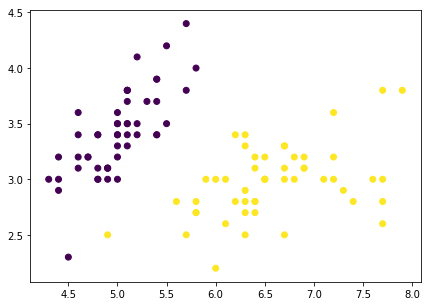

In [319]:
# check if the two classes are linearly seperable 

plt.figure(figsize = (7, 5))

plt.scatter(x2.iloc[:,0], x2.iloc[:,1], c = y2)

In [335]:
# percpetron training and loss visualization in each epoch

def perceptron_sgd_plot(X, y,  add_bias = False):
    # x and y have to be np arrays   
    if add_bias:
        # add bais temrs to the weight vector 
        bias = np.ones(X.shape[0]).reshape(X.shape[0], 1)
        X = np.hstack((X, bias))

    total_error = []
    
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 300

    for epoch in range(epochs):
        epoch_error = 0
        for i in range(X.shape[0]):
            if (np.dot(X[i], w)* y[i]) <= 0:
                w = w + eta*X[i]* y[i]
                
                epoch_error += np.dot(X[i], w)* y[i]
        total_error.append(epoch_error)
    
    
    plt.figure(figsize = (7, 5))
    plt.plot(total_error)
    plt.xlabel('Epoches')
    plt.ylabel('Loss')
    plt.show()
    
    return w

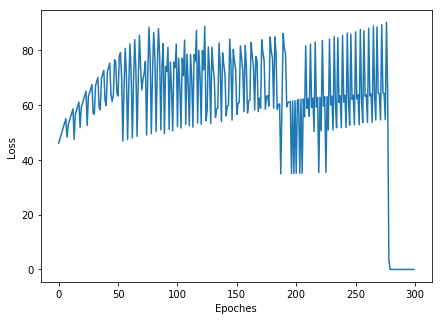

[ 51.8 -76.  -62. ]


In [336]:
# plot and show weights 
weights = perceptron_sgd_plot(x2.values, y2.values, add_bias = True)
print (weights)

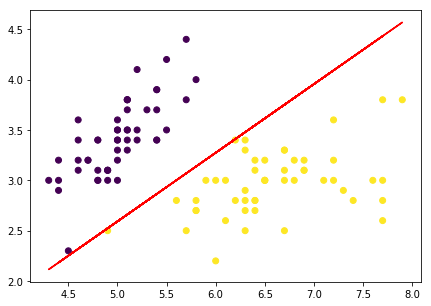

In [338]:
# hyperplane visualization  

plt.figure(figsize = (7, 5))
# training sample
plt.scatter(x2.iloc[:,0], x2.iloc[:,1], c = y2)

w1 = weights[0]
w2 = weights[1]
w3 = weights[2]

# plot the hyperplane function - one feature one axis 
def hype(x2):
    return -(w3/ w2) - (w1/ w2)*x2.iloc[:, 0]   

# hyperplane 
# plt.plot((0, - w3/ w2), (- w3/ w1, 0))  
plt.plot(x2.iloc[:, 0], hype(x2), c = 'r')

In [349]:
# accuracy 
final = np.dot(np.hstack((x2, np.ones((x2.shape[0], 1)))), weights)* y2

# prediction is incorrect when final is less than zero
print ('Accuracy: '+ str((1 - np.sum(final < 0))*100) + "%")

Accuracy: 100%


### compare with scikit learn perceptron 

In [358]:
from sklearn.linear_model import perceptron

sktp = perceptron.Perceptron(n_iter = 100, verbose=0, random_state = None, fit_intercept = True)
sktp.fit(x2, y2)
 
# Print the results
# print ("Prediction: " + str(sktp.predict(x2)))
# print ("Actual: " + str(y2))
print ("Accuracy: " + str(sktp.score(x2, y2)*100) + "%")
print ('scikit-learn weights{0}{1} :'.format(sktp.intercept_, sktp.coef_))

Accuracy: 99.0%
scikit-learn weights[-40.][[ 47.9 -69.5]] :


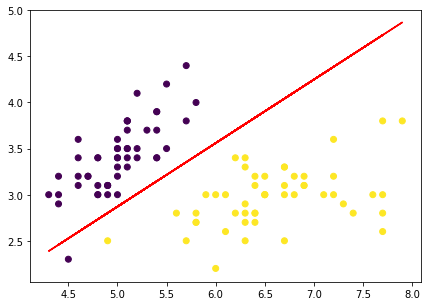

In [359]:
# plot the decision boundary
# perceptron decision function is sgn(w1*x1 + w2*x2 + w3) then the decision boundary equation is a line with canonical form w1*x1 + w2*x2 + w3 = 0.
# to plot such equation: draw a line through (0,-w3/w2) and (-w3/w1,0) (assuming that both w1 and w2 are non-zero)


plt.figure(figsize = (7, 5))
# training sample
plt.scatter(x2.iloc[:,0], x2.iloc[:,1], c = y2)

w1 = sktp.coef_[0][0]
w2 = sktp.coef_[0][1]
w3 = sktp.intercept_

# plot the hyperplane function - one feature one axis 
def hype(x2):
    return -(w3/ w2) - (w1/ w2)*x2.iloc[:, 0]   

# hyperplane 
# plt.plot((0, - w3/ w2), (- w3/ w1, 0))  
plt.plot(x2.iloc[:, 0], hype(x2), c = 'r')

### from perceptron to NN

### from perceptron to SVM

In [3]:
# create some data points and labels - bias terms in the third column of the 2d X array
X = np.array([[-2, 4, -1], [4, 1, -1], [1, 6, -1], [2, 4, -1], [6, 2, -1]])


y = np.array([-1, -1, 1, 1, 1])

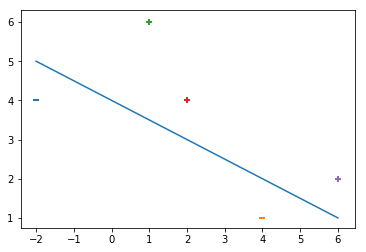

In [4]:
# visualize on 2D plot
for d, sample in enumerate (X):
    # the first two points are negative, and last three are positive
    if d < 2:
        plt.scatter(sample[0], sample[1], marker = '_', linewidth = 2)   
    else:
        plt.scatter(sample[0], sample[1], marker = '+', linewidth = 2)
        
# and plot a potential hyperplane seperating the groups 
plt.plot([-2, 6], [5, 1])

### hinge loss

In [5]:
# define loss function and objective function 
# The hinge loss is used for "maximum-margin" classification, most notably for SVMs.
# if y*f(x) >= 1, zero loss, 1 - y*f(x) otherwise.

# objective function, parameterized by the weight vector w, is made of loss and the regularization term
# regularizer is necessary because of the presence of outliers
# dual(minimization) form of the margin maximization objective 
# objective function is optimized by stochastic gradient descent

In [6]:
# STOCHASTIC gradient descent to learn the seperating hyperplane 

def svm_sgd_plot(X, Y):
    
    # initialize the weight vector with zeros
    w = np.zeros(len(X[0]))
    # learning rate
    eta = 1
    # number of iterations 
    epochs = 100000
    # store misclassification 
    errors = []
    
    # the training 
    for epoch in range(1, epochs):
        error = 0
        for i, x in enumerate(X):
            # account for misclassification y*f(x) < 1 
            if (Y[i]*np.dot(X[i], w)) < 1:
                error = 1
                # weight vector update when the classification is incorrect 
                w = w + eta*((X[i]*Y[i] + (-2* (1/epoch))*w))
            else:
                # weight vector update when the classification is correct
                w = w + eta*(-2*(1/epoch)*w)
        errors.append(error)
        
        
    # plot classification error during training 
    plt.plot(errors, '|')
    plt.axes().set_yticklabels([])

    plt.xlabel('Epoch')
    plt.ylabel('Misclassification')
    
    plt.show()
    
    return w

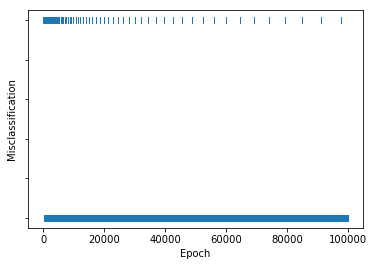

In [7]:
# run 
w = svm_sgd_plot(X,y)

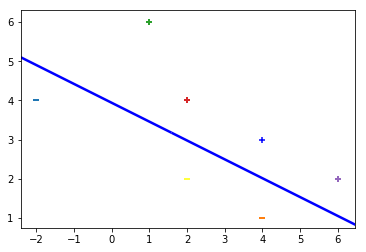

In [8]:
# the visualization of training data 
for d, sample in enumerate (X):
    # the first two points are negative, and last three are positive
    if d < 2:
        plt.scatter(sample[0], sample[1], marker = '_', linewidth = 2)   
    else:
        plt.scatter(sample[0], sample[1], marker = '+', linewidth = 2)
        
# add test data 
plt.scatter(2, 2, marker = '_', linewidths = 2, color = 'yellow')
plt.scatter(4, 3, marker = '+', linewidths = 2, color = 'blue')

# Print the hyperplane calculated by svm_sgd_plot()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale = 1, color = 'blue')

In [ ]:
# stochastic gradient descent and SVM weight update the coefficients fraction 1/N
